In [3]:
from __future__ import print_function
import time 
import requests
import cv2
import operator
import numpy as np

# Import library to display results
import matplotlib.pyplot as plt
%matplotlib inline 
# Display images within Jupyter

In [4]:
# Variables

_url = 'https://westus.api.cognitive.microsoft.com/emotion/v1.0/recognize'
_key = 'ab7ce6eb315b40a4a9fece00b4d61727' #Here you have to paste your primary key
_maxNumRetries = 10

## Helper functions

In [5]:
def processRequest( json, data, headers, params, url ):

    """
    Helper function to process the request to Project Oxford

    Parameters:
    json: Used when processing images from its URL. See API Documentation
    data: Used when processing image read from disk. See API Documentation
    headers: Used to pass the key information and the data type request
    """

    retries = 0
    result = None

    while True:

#         response = requests.request( 'post', _url, json = json, data = data, headers = headers, params = params )
        response = requests.request( 'post', url, json = json, data = data, headers = headers, params = params )
        if response.status_code == 429: 

            print( "Message: %s" % ( response.json()['error']['message'] ) )

            if retries <= _maxNumRetries: 
                time.sleep(1) 
                retries += 1
                continue
            else: 
                print( 'Error: failed after retrying!' )
                break

        elif response.status_code == 200 or response.status_code == 201:

            if 'content-length' in response.headers and int(response.headers['content-length']) == 0: 
                result = None 
            elif 'content-type' in response.headers and isinstance(response.headers['content-type'], str): 
                if 'application/json' in response.headers['content-type'].lower(): 
                    result = response.json() if response.content else None 
                elif 'image' in response.headers['content-type'].lower(): 
                    result = response.content
        else:
            print( "Error code: %d" % ( response.status_code ) )
            print( "Message: %s" % ( response.json()['error']['message'] ) )

        break
        
    return result

In [6]:
def renderResultOnImage( result, img ):
    
    """Display the obtained results onto the input image"""
    
    for currFace in result:
        faceRectangle = currFace['faceRectangle']
        cv2.rectangle( img,(faceRectangle['left'],faceRectangle['top']),
                           (faceRectangle['left']+faceRectangle['width'], faceRectangle['top'] + faceRectangle['height']),
                       color = (255,0,0), thickness = 5 )


    for currFace in result:
        faceRectangle = currFace['faceRectangle']
        currEmotion = max(currFace['scores'].items(), key=operator.itemgetter(1))[0]


        textToWrite = "%s" % ( currEmotion )
        cv2.putText( img, textToWrite, (faceRectangle['left'],faceRectangle['top']-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,0), 1 )

## Detect faces from an image retrieved via URL


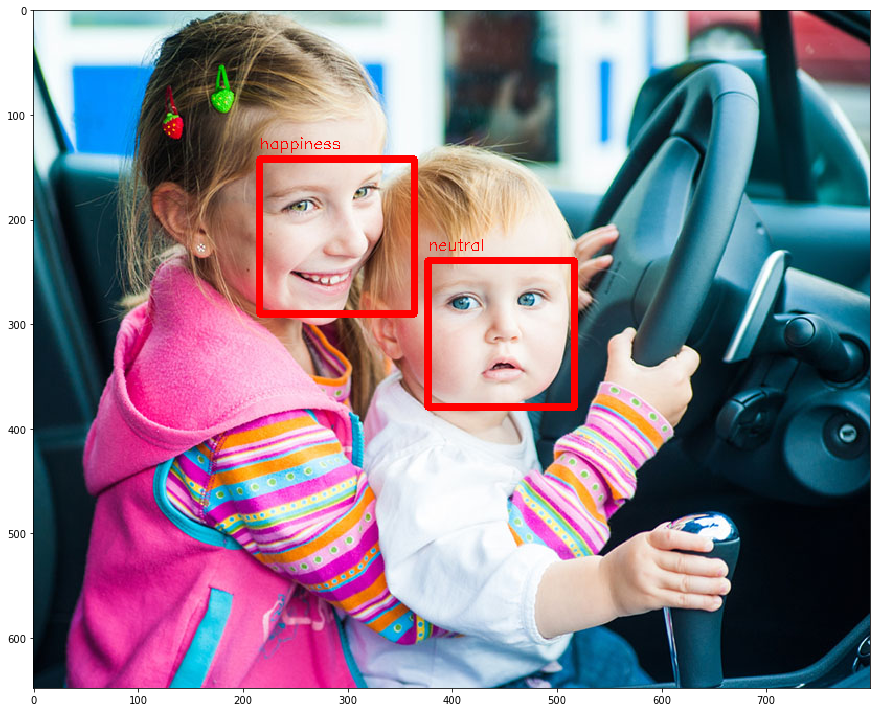

In [28]:
# URL direction to image
urlImage = 'https://raw.githubusercontent.com/Microsoft/ProjectOxford-ClientSDK/master/Face/Windows/Data/detection3.jpg'

headers = dict()
headers['Ocp-Apim-Subscription-Key'] = _key
headers['Content-Type'] = 'application/json' 

json = { 'url': urlImage } 
data = None
params = None

result = processRequest( json, data, headers, params, _url )

if result is not None:
    # Load the original image, fetched from the URL
    arr = np.asarray( bytearray( requests.get( urlImage ).content ), dtype=np.uint8 )
    img = cv2.cvtColor( cv2.imdecode( arr, -1 ), cv2.COLOR_BGR2RGB )

    renderResultOnImage( result, img )

    ig, ax = plt.subplots(figsize=(15, 20))
    ax.imshow( img )

## Detect faces from an image stored on disk


In [7]:
# Load raw image file into memory
pathToFileInDisk = r'test.jpg'
with open( pathToFileInDisk, 'rb' ) as f:
    data = f.read()

headers = dict()
headers['Ocp-Apim-Subscription-Key'] = _key
headers['Content-Type'] = 'application/octet-stream'

json = None
params = urllib.parse.urlencode({
    # Request parameters. All of them are optional.
    'visualFeatures': 'Categories,Description,Color',
    'language': 'en',
})

result = processRequest( json, data, headers, params, new_url )

if result is not None:
    print(result)

NameError: name 'urllib' is not defined

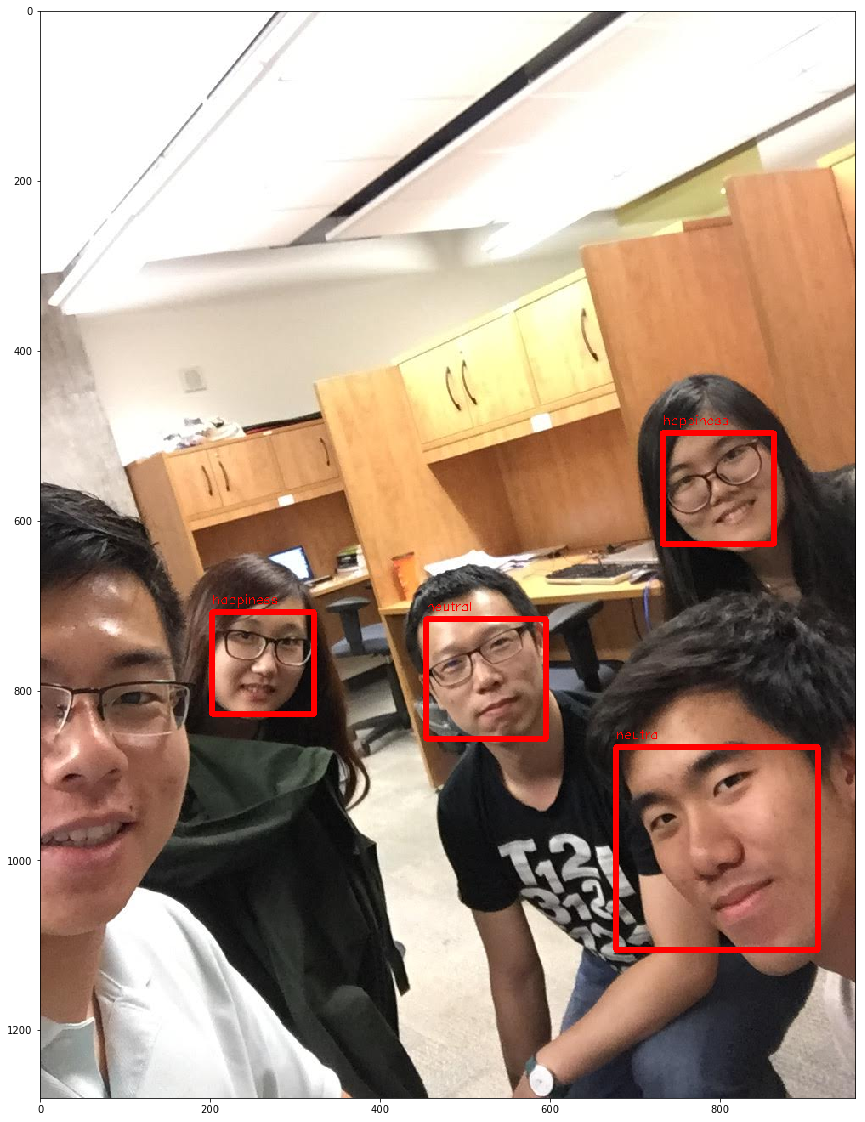

In [11]:
# Load raw image file into memory
path = 'test.jpg'
# pathToFileInDisk = r(path)
with open( path, 'rb' ) as f:
    data = f.read()

headers = dict()
headers['Ocp-Apim-Subscription-Key'] = '942cb5ec8cec4b699aa03e32d2d3a638'
headers['Content-Type'] = 'application/octet-stream'

json = None
params = { 'visualFeatures' : 'Color,Categories'} 

result = processRequest( json, data, headers, params, _url )

if result is not None:
    # Load the original image, fetched from the URL
    data8uint = np.fromstring( data, np.uint8 ) # Convert string to an unsigned int array
    img = cv2.cvtColor( cv2.imdecode( data8uint, cv2.IMREAD_COLOR ), cv2.COLOR_BGR2RGB )

    renderResultOnImage( result, img )

    ig, ax = plt.subplots(figsize=(15, 20))
    ax.imshow( img )

In [18]:
import http.client, urllib.request, urllib.parse, urllib.error, base64, json

###############################################
#### Update or verify the following values. ###
###############################################

# Replace the subscription_key string value with your valid subscription key.
subscription_key = '25b9fed816544981a50c0f520214a178'

# Replace or verify the region.
#
# You must use the same region in your REST API call as you used to obtain your subscription keys.
# For example, if you obtained your subscription keys from the westus region, replace 
# "westcentralus" in the URI below with "westus".
#
# NOTE: Free trial subscription keys are generated in the westcentralus region, so if you are using
# a free trial subscription key, you should not need to change this region.
uri_base = 'westcentralus.api.cognitive.microsoft.com'

headers = {
    # Request headers.
    'Content-Type': 'application/json',
    'Ocp-Apim-Subscription-Key': subscription_key,
}

params = urllib.parse.urlencode({
    # Request parameters. All of them are optional.
    'visualFeatures': 'Categories,Description,Color',
    'language': 'en',
})

# Replace the three dots below with the URL of a JPEG image of a celebrity.
body = "{'url':'https://upload.wikimedia.org/wikipedia/commons/1/12/Broadway_and_Times_Square_by_night.jpg'}"

try:
    # Execute the REST API call and get the response.
    conn = http.client.HTTPSConnection('westcentralus.api.cognitive.microsoft.com')
    conn.request("POST", "/vision/v1.0/analyze?%s" % params, body, headers)
    response = conn.getresponse()
    data = response.read().decode()

    # 'data' contains the JSON data. The following formats the JSON data for display.
    parsed = json.loads(data)
    print ("Response:")
    print (json.dumps(parsed, sort_keys=True, indent=2))
    conn.close()

except Exception as e:
    print('Error:')
    print(e)

Response:
{
  "categories": [
    {
      "name": "outdoor_street",
      "score": 0.625
    }
  ],
  "color": {
    "accentColor": "B74314",
    "dominantColorBackground": "Brown",
    "dominantColorForeground": "Brown",
    "dominantColors": [
      "Brown"
    ],
    "isBWImg": false
  },
  "description": {
    "captions": [
      {
        "confidence": 0.8241405091548035,
        "text": "a group of people on a city street filled with traffic at night"
      }
    ],
    "tags": [
      "outdoor",
      "building",
      "street",
      "city",
      "busy",
      "people",
      "filled",
      "traffic",
      "many",
      "table",
      "car",
      "group",
      "walking",
      "bunch",
      "crowded",
      "large",
      "night",
      "light",
      "standing",
      "man",
      "tall",
      "umbrella",
      "riding",
      "sign",
      "crowd"
    ]
  },
  "metadata": {
    "format": "Jpeg",
    "height": 2436,
    "width": 1826
  },
  "requestId": "e8ba14a2-d09f-4